# TP 8 : Théorème de Ramsey

L'objectif de ce TP est d'obtenir des résultats autour du théorème de Ramsey par exploration combinatoire.

## 1. Classe `RelationSymetrique`

* Créer une classe `RelationSymetrique` pour représenter et manipuler les relations binaires symétriques sur les ensembles du type $\{0,\ldots,n-1\}$, où $n\in\mathbb{N}^*$.
    * Cette classe aura pour attributs :
        * `n` : le nombre d'éléments de l'ensemble ;
        * `table`: la table d'adjacence (sous forme d'une liste de listes de booléens) décrivant la relation binaire.
    * La méthode `__init__` prendra en paramètre (en plus de `self`) le nombre d'éléments de l'ensemble et initialisera la table d'adjacence avec uniquement des `False` (cela revient à créer la relation binaire où aucun couple d'éléments n'est en relation).
    * Cette classe contiendra également les méthodes suivantes :
        * `metRelation` qui prend en paramètre deux éléments `i` et `j`, et qui modifie la table d'adjacence de façon à ajouter la relation entre $i$ et $j$ (ainsi que la relation entre $j$ et $i$ puisqu'il s'agit d'une relation symétrique) ;
        * `supprimeRelation` qui prend en paramètre deux éléments `i` et `j`, et qui modifie la table d'adjacence de façon à supprimer la relation entre $i$ et $j$ (ainsi que la relation entre $j$ et $i$ puisqu'il s'agit d'une relation symétrique) ;
        * `metListeRelations` qui prend en paramètre une liste de couples, et qui modifie la table d'adjacence de façon à ajouter les relations (symétriques) entre ces couples ;
        * `__str__` qui retourne la chaîne de charactères représentant la liste des paires d'éléments en relation (et non les couples).
        
Pour compléter la description de cette classe, voici un exemple d'utilisation.    
~~~
>>> R=RelationSymetrique(4)
>>> print(R)
[]

>>> R.metRelation(0,1)
>>> R.table
[[False, True, False, False],
 [True, False, False, False],
 [False, False, False, False],
 [False, False, False, False]]
 
>>> R.metListeRelations([(0,2), (0,3), (1,2), (2,3)])
>>> R.supprimeRelation(0,3)
>>> print(R)
[(0, 1), (0, 2), (1, 2), (2, 3)]
~~~

In [1]:
class RelationSymetrique:
    
    
    def __init__(self, n: int):
        self.n = n
        self.table = [[False] * n for _ in range(n)]
        
        
    def metRelation(self, i: int, j: int):
        self.table[j][i] = True
        self.table[i][j] = True
        
        
    def supprimeRelation(self, i: int, j: int):
        self.table[j][i] = False
        self.table[i][j] = False
        
        
    def metListeRelations(self, relations: list):
        for (i, j) in relations:
            self.metRelation(i, j)
            
            
    def suivant(self):
        for i in range(1, self.n):
            for j in range(i):
                if not self.table[i][j]:
                    self.metRelation(i, j)
                    return True
                self.supprimeRelation(i, j)
        return False
            
            
    def __str__(self):
        result = list()
        for i in range(self.n):
            for j in range(i):
                if self.table[j][i]:
                    result.append(set([i, j]))
        return str(result)

* Tester la classe `RelationSymetrique` en reproduisant les exemples de l'énoncé.

In [2]:
R = RelationSymetrique(4)
print(R)

R.metRelation(0, 1)
print(R.table)

R.metListeRelations([(0, 2), (0, 3), (1, 2), (2, 3)])
R.supprimeRelation(0, 3)
print(R)

[]
[[False, True, False, False], [True, False, False, False], [False, False, False, False], [False, False, False, False]]
[{0, 1}, {0, 2}, {1, 2}, {2, 3}]


## 2. Parcours de toutes les relations binaires symétriques antiréflexives

Dans ce TP, on cherche à obtenir des résultats autour du théorème de Ramsey par exploration combinatoire. Or les propriétés de Ramsey ne font jamais intervenir le fait qu'un élément soit en relation avec lui même ou non. On peut donc se limiter à l'exploration des relations binaires antiréflexives, ce qui réduit le nombre de cas.


Pour parcourir toutes les relations binaires symétriques antireflexives, on s'inspire d'un compteur binaire sur $k$ bits.

**Exemple avec $k=6$**. 
- On commence avec $k$ fois zero : `000000`.
- On obtient le nombre suivant en changeant le dernier $0$ en $1$: `000001`.
- Pour avoir celui d'après, c'est un peu plus compliqué car il y a une retenue quand on ajoute $1$ en binaire, il faut remettre le dernier bit à $0$ avant de mettre l'avant dernier à $1$:  `000010`.
- De façon générale, pour aller au suivant il faut, de droite à gauche, changer tous les $1$ en $0$ (propagation de la retenue), puis remplacer le $0$ le plus à droite par un $1$, s'il existe: `010111` devient `011000`.
- On s'arrête quand il n'y a que des $1$ : il n'y a pas de suivant.



- Ajouter à la classe `RelationSymetrique` une méthode `suivant` qui fonctionne ainsi.
    - Elle parcourt les couples $(i,j)$, avec $i<j$, dans l'ordre lexicographique : 
        - si $i \not R j$, alors on rajoute le fait que $i R j$ dans la relation (analogie avec le compteur : le 0 devient un 1) et on s'arrête et on renvoie `True`. On a changé la relation binaire en la relation binaire suivante.
        - si $i R j$, alors on enlève le fait que $i R j$ dans la relation (analogie avec le compteur : on propage la retenue et le 1 devient un 0) et on continue en passant au couple $(i,j)$ suivant.
    - Si l'on ne s'est pas arrêté au cours du parcours des couples $(i,j)$ c'est que l'on a fini de parcourir les relation binaires antireflexives, on s'arrête et on renvoie `False`.

- Tester la méthode `suivant` en affichant les 8 relations binaires symétriques antireflexives sur l'ensemble $\{0,1,2\}$.

In [3]:
R = RelationSymetrique(3)

print(R)
for i in range(7):
    R.suivant()
    print(R)

[]
[{0, 1}]
[{0, 2}]
[{0, 1}, {0, 2}]
[{1, 2}]
[{0, 1}, {1, 2}]
[{0, 2}, {1, 2}]
[{0, 1}, {0, 2}, {1, 2}]


## 3. Théorème de Ramsey pour $p=3$ et $q=3$

- Ecrire une fonction `groupe3Amis` qui détermine s'il existe un groupe de 3 amis dans une relation `R`.

In [4]:
def groupe3Amis(R: RelationSymetrique):
    for i in range(R.n):
        for j in range(i + 1, R.n):
            for k in range(j + 1, R.n):
                if R.table[i][j] and R.table[i][k] and R.table[j][k]:
                    return True
    return False

- Ecrire une fonction `groupe3Etrangers` qui détermine s'il existe un groupe de 3 étrangers dans une relation `R`.

In [5]:
def groupe3Etrangers(R: RelationSymetrique):
    for i in range(R.n):
        for j in range(i + 1, R.n):
            for k in range(j + 1, R.n):
                if not (R.table[i][j] or R.table[i][k] or R.table[j][k]):
                    return True
    return False

- Ecrire une fonction `testRamsey33` qui prend en paramètre un entier `n` et teste si toutes les relations binaires symétriques antiréflexives sur $\{0,\ldots,n-1\}$ vérifient la propriété de Ramsey pour $p=3$ et $q=3$.

In [6]:
def testRamsey33(n: int):
    R = RelationSymetrique(n)
    for i in range(2 ** ((n * (n - 1) // 2))):
        if not (groupe3Amis(R) or groupe3Etrangers(R)):
            return False
        R.suivant()
    return True

- En utilisant la fonction `testRamsey33`, démontrer le théorème de Ramsey pour $p=3$ et $q=3$ et déterminer $R(3,3)$.

In [7]:
testRamsey33(6)

True

## 4. Théorème de Ramsey pour $p=4$ et $q=3$

- Ecrire une fonction `groupe4Amis` qui détermine s'il existe un groupe de 4 amis dans une relation `R`.

In [8]:
def groupe4Amis(R: RelationSymetrique):
    for i in range(R.n):
        for j in range(i + 1, R.n):
            for k in range(j + 1, R.n):
                for l in range(k + 1, R.n):
                    if R.table[i][j] and R.table[i][k] and R.table[i][l] and R.table[j][k] and R.table[j][l] and R.table[k][l]:
                        return True
    return False

- Ecrire une fonction `ctrexRamsey43` qui prend en paramètre un entier `n` et renvoie une relation binaire symétrique sur $\{0,\ldots,n-1\}$ qui ne vérifie pas la propriété de Ramsey pour $p=4$ et $q=3$ (ou renvoie `None` s'il n'en existe pas).

In [9]:
def ctrexRamsey43(n: int):
    R = RelationSymetrique(n)
    for i in range(2 ** ((n * (n - 1) // 2))):
        if not (groupe4Amis(R) or groupe3Etrangers(R)):
            return R
        R.suivant()

- A l'aide de la fonction `ctrexRamsey43`, déterminer une relation binaire symétrique sur un ensemble de cardinal 7 qui ne vérifie pas la propriété de Ramsey pour $p=4$ et $q=3$.

In [10]:
R43 = ctrexRamsey43(7)

print(R43)

[{0, 2}, {1, 2}, {1, 3}, {0, 4}, {3, 4}, {0, 5}, {3, 5}, {4, 5}, {0, 6}, {1, 6}, {2, 6}]


- Tracer le diagramme de cette relation binaire l'aide des paquets `networkx` et `matplotlib` (voir l'exemple de tracé de diagramme ci-dessous).

<IPython.core.display.Javascript object>


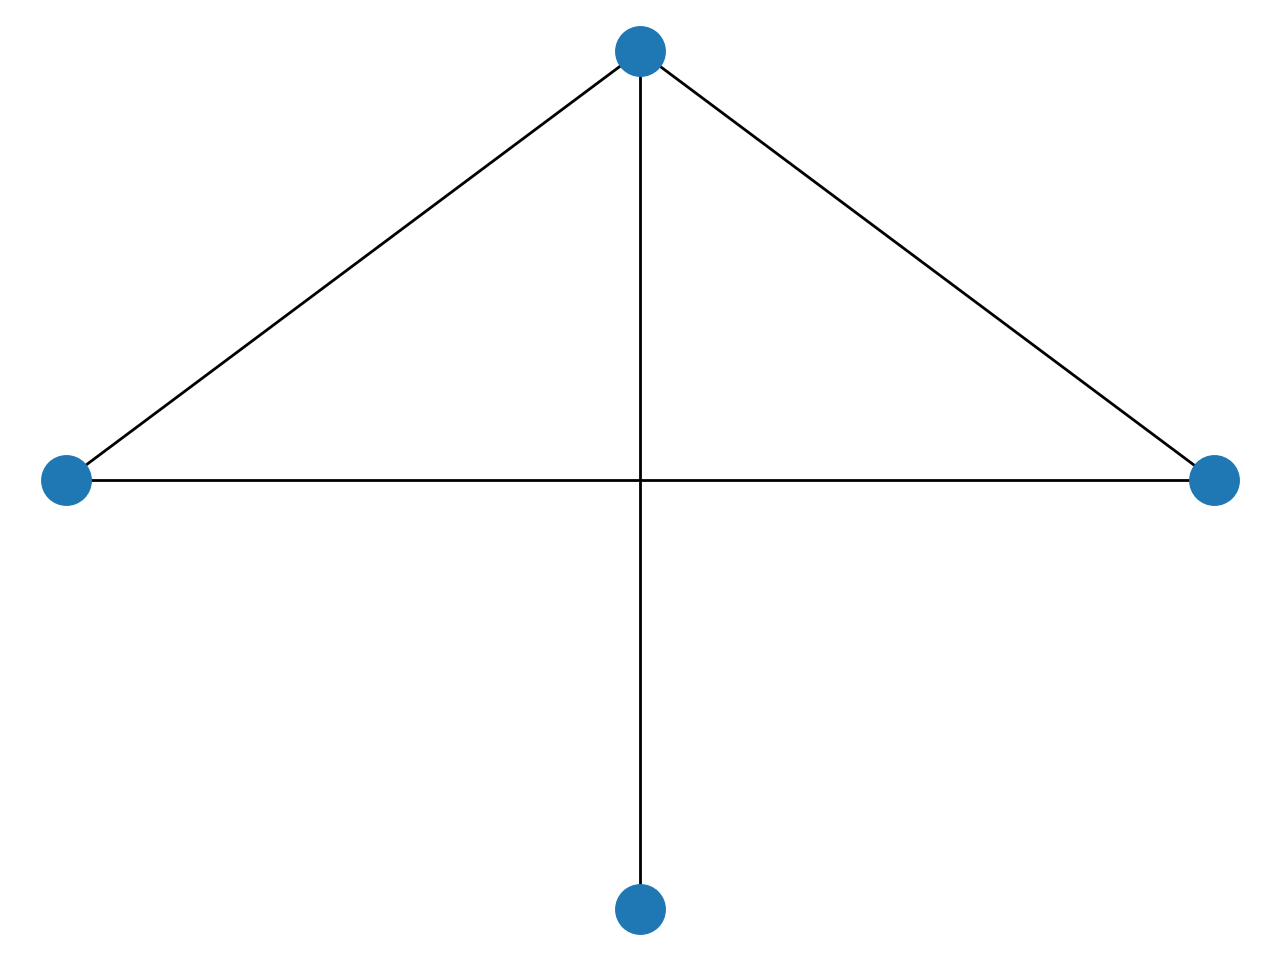

In [11]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (3, 1)])
nx.draw_circular(G)
plt.show()

<IPython.core.display.Javascript object>


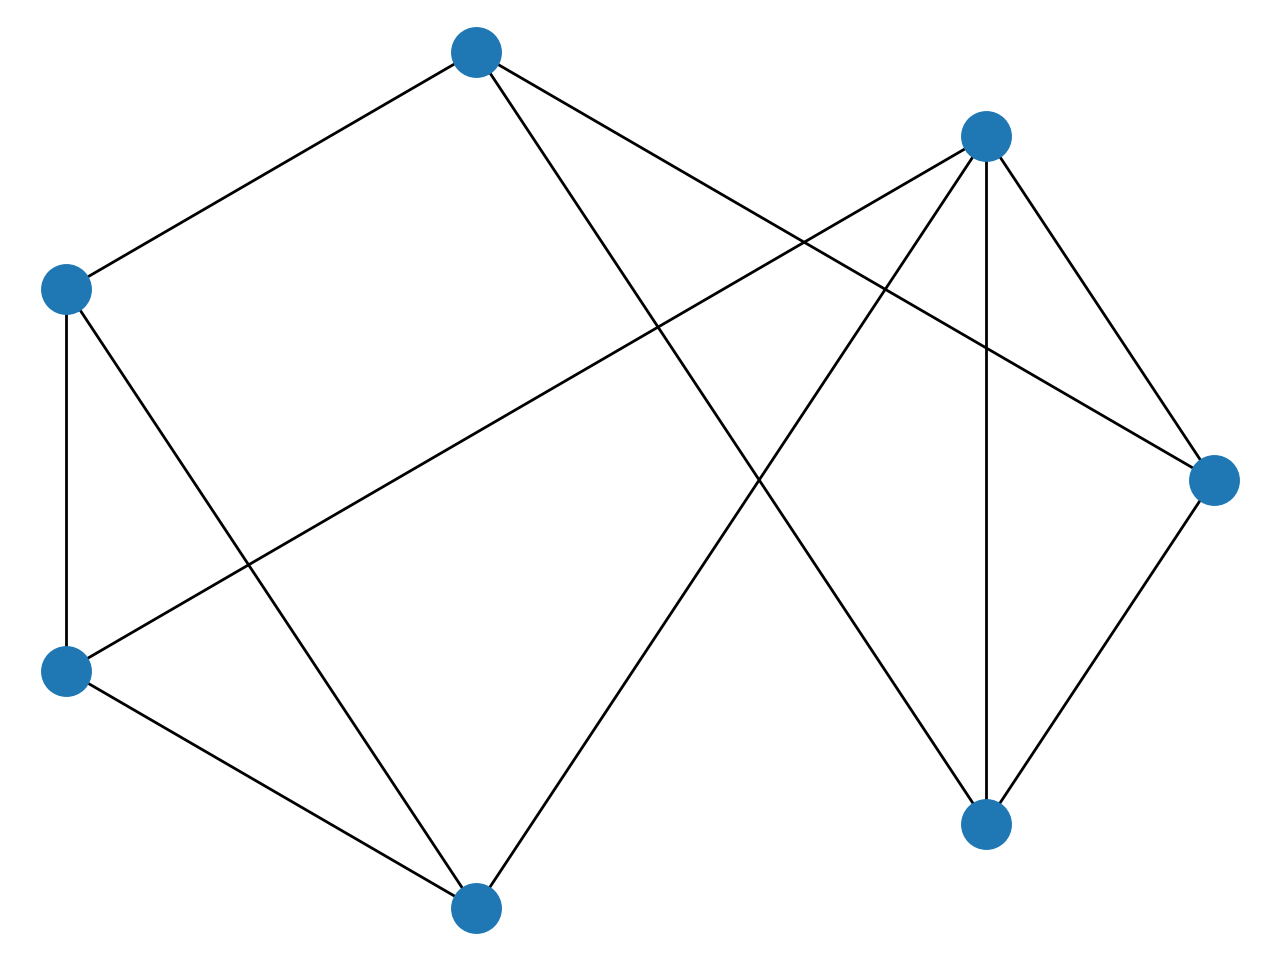

In [12]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt


edges = list()
for i in range(R43.n):
    for j in range(i):
        if R43.table[j][i]:
            edges.append((i, j))

G = nx.Graph()
G.add_edges_from(edges)
nx.draw_circular(G)
plt.show()